# Graph Coloring Analysis Project

This project looks at implementing an algorithm in multiple ways to solve a problem, analyzing the
algorithms’ implementations for running time, and testing and your implementations to show they
match your analysis. The project also looks at testing to determine how well the multiple
implementations solve the problem.<br/>
The particular problem for the project is scheduling via graph coloring. For the first part of the project,
different conflict graphs which can represent real world problems will be created and saved in files. For
the second part of the problem, various coloring orders will be implemented and analyzed for runtime
efficiency and coloring efficiency. These efficiencies are intimately related to the data structures used
for both the input graph data and the intermediate data necessary for the ordering and coloring
algorithms.

## Part 1

### Purpose

Part 1 of the project is used to create different conflict graphs. Conflict graphs represent realworld problems. For example, one may be thought of as a set of vertices representing courses that students may take. An edge is present between two vertices (courses) in the graph if a student is taking both courses. This edge indicates they may not be scheduled at the same time.<br/>
Once the graph is colored, the color of each vertex represents its timeslot and the total number of colors would represent the total number of required timeslots for that coloring.<br/>
The vertices which have a conflict in this project will be determined based on graph types and a random number generator with different distributions.

-------------------------------------------
#### My Notes
Vertex is a class<br/>
Edge means a student is taking both classes (the vertices connected) -> that can't happen, represents a conflict, need =/ colors<br/>
graphs are generated by graph types and random generator w/ =/ distributions<br/>

-------------------------------------------

In [1]:
# Imports
import numpy as np
from scipy.stats import skew
import random
import matplotlib.pyplot as plt

In [2]:
def complete(V):
  # Create Adjacency List
  adj = [[0 for i in range(V)] for j in range(V)]

  # Fill in vertices at the first column in all rows
  for index in range(V):
    adj[index][0] = index + 1
  
  index = 0
  found = False

  for r in range(len(adj)):
    found = False
    for c in range(len(adj[r])):
        # Skip over first column
        if c == 0:
          index = adj[r][c]
          # print(index) # CORRECT
        
        # Iterate V-1 times, fill other spots with all values except index
        else:          
          # Check if the current edge is the same as the vertex
          if c == index:
            found = True

          # If it has found the vertex, then just skip it and all next values
          # will be + 1
          if found:
            adj[r][c] = c + 1
          else:
            adj[r][c] = c

  return adj

In [3]:
def cycle(V):
    adj = [[0 for i in range(3)] for j in range(V)]

    for index in range(V):
        adj[index][0] = index + 1
    
    for r in range(len(adj)):
        # Each vertex only has 2 edges in a cycle
        # These edges are either + or - 1 in relation to the value of the vertex
        adj[r][1] = adj[r][0] - 1
        adj[r][2] = adj[r][0] + 1

        # Check if the value is not 0 or over the number of vertices
        if adj[r][1] == 0:
            adj[r][1] = V
        
        if adj[r][2] == V+1:
            adj[r][2] = 1
    
    return adj

In [40]:
def uniform_dist(V, E):
    # Create Adjacency List
    adj = [[i+1] for i in range(V)]
    
    # Loop to create E edges
    for edges in range(E):
        # Select 2 random vertices to connect
        rand_index1 = random.randint(0, V-1)
        rand_index2 = random.randint(0, V-1)
        while rand_index1 == rand_index2:
            rand_index2 = random.randint(0, V-1)
        
        # Add edges to the adjacency list if the edge doesn't exist yet
        if rand_index2+1 not in adj[rand_index1]:
            adj[rand_index1].append(rand_index2+1)
            adj[rand_index2].append(rand_index1+1)
        else:
            edges -= 1
    
    return adj

# uniform_dist(5, 3)
# adj is a list of lists

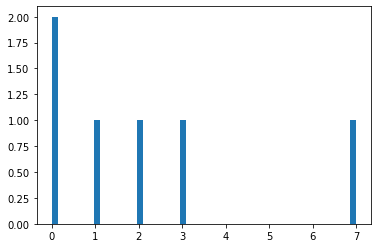

[0, 1, 3, 7, 2, 0]


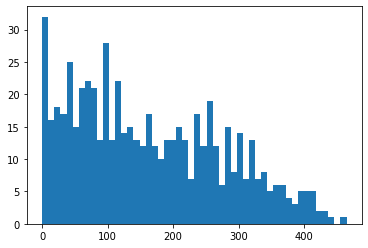

[238,
 119,
 289,
 242,
 3,
 238,
 173,
 376,
 176,
 119,
 25,
 296,
 91,
 7,
 319,
 60,
 42,
 205,
 60,
 16,
 211,
 174,
 66,
 367,
 74,
 129,
 21,
 345,
 181,
 351,
 139,
 12,
 234,
 227,
 335,
 400,
 205,
 5,
 157,
 117,
 287,
 240,
 199,
 100,
 7,
 175,
 165,
 197,
 200,
 117,
 270,
 434,
 284,
 296,
 266,
 34,
 221,
 54,
 184,
 21,
 198,
 20,
 196,
 105,
 237,
 71,
 145,
 254,
 437,
 279,
 8,
 82,
 296,
 215,
 131,
 196,
 288,
 165,
 320,
 19,
 99,
 120,
 11,
 151,
 255,
 313,
 3,
 381,
 64,
 94,
 126,
 268,
 5,
 298,
 174,
 132,
 49,
 167,
 200,
 344,
 61,
 302,
 23,
 226,
 61,
 261,
 73,
 302,
 255,
 174,
 263,
 42,
 166,
 32,
 91,
 25,
 200,
 36,
 188,
 412,
 332,
 11,
 180,
 393,
 37,
 118,
 94,
 265,
 125,
 68,
 323,
 162,
 119,
 78,
 21,
 256,
 303,
 280,
 86,
 70,
 40,
 41,
 321,
 317,
 194,
 247,
 118,
 321,
 33,
 424,
 70,
 257,
 257,
 138,
 62,
 107,
 364,
 167,
 266,
 298,
 234,
 147,
 259,
 44,
 157,
 137,
 45,
 184,
 92,
 318,
 251,
 33,
 153,
 41,
 163,
 200,
 282,
 

In [39]:
def skewed_dist(V, E):
    # Create Adjacency List
    # adj = [[i+1] for i in range(V)]
    
    
    r4 = np.random.triangular(0, 0, V, E)
    r4 =  [int(x) for x in r4]
    # Graph to show the distribution
    plt.hist(r4, bins=50)
    plt.show()
    
    return r4

print(skewed_dist(10, 6))
skewed_dist(500, 600)

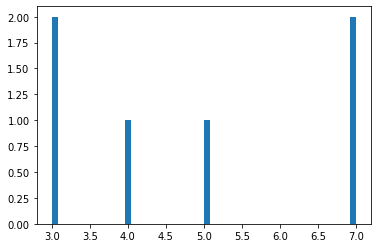

[3, 4, 7, 7, 3, 5]


In [28]:
def binomial_dist(V, E):
    # Create Adjacency List
    adj = [[i+1] for i in range(V)]
    
    r4 = [np.random.binomial(V, 0.5) for i in range(E)]
    # Graph to show the distribution
    plt.hist(r4, bins=50)
    plt.show()
    
    return r4

print(binomial_dist(10, 6))

In [7]:
import networkx as nx

def create_graph(V, E, G, DIST):    
    if G == 'COMPLETE':
        graph = complete(V)
    elif G == 'CYCLE':
        graph = cycle(V)
    else: # G == 'RANDOM'
        if DIST == 'UNIFORM':
            graph = uniform_dist(V, E)
        elif DIST == 'SKEWED':
            graph = skewed_dist(V, E)
        else: # DIST == 'FREQUENCY'
            graph = binomial_dist(V, E)
    
    print(graph)



### Input

* V = Number of vertices. (MAX = 10,000)
* E = Number of conflicts between pairs of vertices for random graphs. (MAX = 2,000,000)
* G = COMPLETE | CYCLE | RANDOM (with DIST below)
* DIST = UNIFORM | SKEWED | YOURS

### Output

* E[] = adjacency list of distinct course conflicts (length = 2M)
* P[] = Pointer for each course I, 1 <= I <= N denoting the starting point in E[] of the list of
courses in conflict with course I. 
  * That is, the conflicts for course I are indicated in locations E[P[I]], E[P[I]+1], …, E[P[I+1]-1].

### Procedure

The vertices for conflicts shall be chosen using a pseudo random number generator according to one of the specified distributions. These distributions are uniform, skewed, and one other of your choosing.<br/>
The uniform distribution assumes each vertex is equally likely to be chosen for a conflict. The skewed distribution assumes lower numbered vertices are linearly more likely than higher numbered vertices.<br/>
Graphs of these distributions are shown below. <br/><br/>
![Graph1](Probability-of-Choosing-Graphs.png)<br/>
**You may use a built-in uniform distribution pseudo-random number generator, but must base the
other distributions on the output of this built-in generator.**

## Part 2

### Input: A file like the output in Part 1

* P[] = Pointer for each course I, 1 <= I <= N denoting the starting point in E[] of the list of
courses in conflict with course I.
  * That is, the conflicts for course I are indicated in locations E[P[I]], E[P[I]+1], …, E[P[I+1]-1].
* E[] = adjacency list of distinct course conflicts (length = 2M).

### Output

* For each vertex the color, original degree, (and degree when deleted for the smallest last ordering). These should be printed in the order colored.
* Total number of colors used, the average original degree, and the maximum “degree when deleted” value for the smallest last ordering, and the size of the terminal clique for the smallest last ordering.
* Any other summary data you wish to include.
* An output file of the format where each line is VERTEX_NUMBER, COLOR_NUMBER.

### Procedure

CS-7350 students are to use six different methods for ordering the vertices in the graph. One method all
students are to use is the smallest last ordering given below, another is the smallest original degree last
and the final one for all students is a uniform random ordering. The other orderings are of your own
choosing. Then you are to assign the minimum color to each vertex in the order determined by each
ordering so that it doesn’t conflict with the other vertices already colored. You will then report on the
following criteria for the different ordering methodologies:
* Asymptotic running time for Smallest Last Ordering and Coloring
* Total number of colors needed for each ordering for various graph types
* Report any other interesting metric for each ordering

### Smallest Vertex Ordering

The following format for the values of variables in various fields of the data node for each vertex may be used to save storage space. You may also split fields into different ones to avoid overloading a field for code readability and maintenance.<br/><br/>
![Table Example](Table-Example.png)<br/>
1. Establish the pointers to the lists of vertices of degree j, 0 <= j <= N-1, and any other pointers
or variables needed.
2. Create the code to iteratively delete a vertex of smallest degree, updating the third and
fourth fields of each data node to relate to the remaining graph, adding the vertex deleted
to the ordered list of vertices deleted.
3. After all vertices have been deleted, scan and assign colors (session periods) to each vertex
in an order opposite to the order deleted, assigning for a “color” the smallest non-negative
integer not previously assigned to any adjacent vertex. The output associated with each
vertex may be printed as the coloring is assigned.
4. Print any further output and summary information for the schedule.

For additional output with METHOD 1 you should include
* A graph indicating the degree when deleted on the vertical axes and the order colored on the x-axis.
* The maximum degree when deleted.
* The size of the terminal clique.
* Any other summary data you wish to include.

| Vertex 1    | Field 1     | Field 2     | Field 3     | Field 4     |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| Header      | Title       | Syntax      | Description | ds          |
| Paragraph   | Text        | Syntax      | Description | sdaa        |

### Smallest Original Degree Last

The Smallest Original Degree Last method is a subset of the smallest last ordering. You should
determine the vertices to color based on their original degree, but not remove them from the
graph as you do it. This should run in THETA(V+E).

### Testing

You should test your program in such a fashion to convince me it operates as expected. Test input files
will also be provided.